In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import hepherolib.data as data
import hepherolib.analysis as ana
ana.start()

In [2]:
# %%
#==================================================================================================
# Read files
#==================================================================================================
basedir = "/home/raphael/Desktop/analysis_DM_2HDM_had/AP_bbhZDM_Had_R3/Test/datasets/0_22"
period = '22'
luminosity = '41.5'

# ds = data.read_files(basedir, period)
ds = data.read_files(basedir)


Loading datasets...


100%|██████████| 79/79 [00:01<00:00, 62.32it/s]


In [3]:
# print(ds)

In [4]:

data.join_datasets(ds, "Residual", [
    "WtoLNu_0J",
    "WtoLNu_1J",
    "WtoLNu_2J",
    "TWminusto4Q",
    "TWminustoLNu2Q",
    "WplusH_Hto2B_Wto2Q",
    "WplusH_Hto2B_WtoLNu",
    "WplusH_Hto2C_Wto2Q",
    "WplusH_Hto2C_WtoLNu",
    # "WplusHtoInv_Wto2Q",
    "WminusH_Hto2B_Wto2Q",
    "WminusH_Hto2B_WtoLNu",
    "WminusH_Hto2C_Wto2Q",
    "WminusH_Hto2C_WtoLNu",
    # "WminusHtoInv_Wto2Q",
    "WWW",
    "WWZ",
    "WZZ",
    "ZZZ",
    "ZH_Hto2B_Zto2L",
    "ZH_Hto2B_Zto2Q",
    "ZH_Hto2C_Zto2L",
    "ZH_Hto2C_Zto2Q",
    # "ZHtoInv_Zto2Q",
    ])

data.join_datasets(ds, "Bkg_4b", [
    # 'QCD_PT-15to30',
    # 'QCD_PT-30to50',
    'QCD_PT-50to80',
    'QCD_PT-80to120',
    'QCD_PT-120to170',
    'QCD_PT-170to300',
    'QCD_PT-300to470',
    'QCD_PT-470to600',
    'QCD_PT-600to800',
    'QCD_PT-800to1000',
    'QCD_PT-1000to1400',
    'QCD_PT-1400to1800',
    'QCD_PT-1800to2400',
    'QCD_PT-2400to3200',
    # 'QCD_PT-3200toInf',
    'ttHto2B',
    'ttHto2C',
    ])

data.join_datasets(ds, "TT", [
    'TTto4Q',
    'TTtoLNu2Q',
    ])

data.join_datasets(ds, "Wto2Q", [
    'Wto2Q_PTQQ-100to200_1J',
    # 'Wto2Q_PTQQ-100to200_2J',
    # 'Wto2Q_PTQQ-200to400_1J',
    'Wto2Q_PTQQ-200to400_2J',
    'Wto2Q_PTQQ-400to600_1J',
    'Wto2Q_PTQQ-400to600_2J',
    'Wto2Q_PTQQ-600_1J',
    'Wto2Q_PTQQ-600_2J',
    ])

data.join_datasets(ds, "WtoLNu", [
    'WtoLNu_PTLNu-100to200_1J',
    'WtoLNu_PTLNu-100to200_2J',
    'WtoLNu_PTLNu-200to400_1J',
    'WtoLNu_PTLNu-200to400_2J',
    'WtoLNu_PTLNu-400to600_1J',
    'WtoLNu_PTLNu-400to600_2J',
    'WtoLNu_PTLNu-40to100_1J',
    'WtoLNu_PTLNu-40to100_2J',
    'WtoLNu_PTLNu-600_1J',
    'WtoLNu_PTLNu-600_2J',
    ])

data.join_datasets(ds, "VZ", [
    'WZto2L2Q',
    'WZto3LNu',
    'WZtoLNu2Q',
    'ZZto2L2Nu',
    'ZZto2L2Q',
    'ZZto2Nu2Q',
    ])

data.join_datasets(ds, "Zto2Nu", [
    'Zto2Nu_PTNuNu-100to200_1J',
    'Zto2Nu_PTNuNu-100to200_2J',
    'Zto2Nu_PTNuNu-200to400_2J',
    'Zto2Nu_PTNuNu-200to400',
    'Zto2Nu_PTNuNu-400to600_1J',
    'Zto2Nu_PTNuNu-400to600_2J',
    'Zto2Nu_PTNuNu-40to100_1J',
    'Zto2Nu_PTNuNu-40to100_2J',
    'Zto2Nu_PTNuNu-600_1J',
    'Zto2Nu_PTNuNu-600_2J',
    ])

data.join_datasets(ds, "Zto2Q", [
    'Zto2Q_PTQQ-100to200_1J',
    'Zto2Q_PTQQ-100to200_2J',
    'Zto2Q_PTQQ-200to400_1J',
    'Zto2Q_PTQQ-200to400_2J',
    'Zto2Q_PTQQ-400to600_1J',
    'Zto2Q_PTQQ-400to600_2J',
    'Zto2Q_PTQQ-600_1J',
    'Zto2Q_PTQQ-600_2J',
    ])


In [5]:
# data.join_datasets(ds, "Data", [ # It changes for each year
#     "Data_B", 
#     "Data_C", 
#     "Data_D", 
#     "Data_E", 
#     "Data_F",
#     ])

In [6]:
def signal_label(param_0, param_1):
    label = r'$m_H=$' + str(param_0) + r', $m_\mathit{a}=$' + str(param_1)
    return label

In [7]:
#==================================================================================================
# Plot
#==================================================================================================
# fig1 = plt.figure(figsize=(20,7.5))
# grid = [2, 3]
# gs1 = gs.GridSpec(grid[0], grid[1], height_ratios=[4, 1])

fig1 = plt.figure(figsize=(8,7))
grid = [2, 1] #Número de colunas
gs1 = gs.GridSpec(grid[0], grid[1], height_ratios=[4, 1])

<Figure size 800x700 with 0 Axes>

### Determine the cuts to apply in the dataset

In [8]:
df = ds.copy()
# for key in df.keys():
#     dataset = df[key]
#     df[key] = dataset[(dataset["RegionID"] == 2)]

In [9]:
# colors = ['gainsboro', 'orchid', 'limegreen', 'red', 'skyblue', 'darkgoldenrod']
# labels = [r'Residual SM', r'$WZ$', r'$ZZ$', 'Single top', r'$t\bar{t}$', 'Drell-Yan']
# dataframes = [df["Residual"], df["WZ"], df["ZZ"], df["ST"], df["TT"], df["DYJetsToLL"]]
# dataframes, labels, colors, sizes = data.order_datasets(dataframes, labels, colors)

# "Signal","Residual","Bkg_4b","TT","Wto2Q","WtoLNu","VZ","Zto2Nu","Zto2Q"

colors = ['gainsboro', 'orchid', 'limegreen', 'red', 'skyblue', 'darkgoldenrod', 'yellow', 'black']
labels = [r'Residual SM', r'Bkg_4b', r'TT', 'Wto2Q', 'WtoLNu', 'VZ', 'Zto2Nu', 'Zto2Q']
dataframes = [df["Residual"], df["Bkg_4b"], df["TT"], df["Wto2Q"], df["WtoLNu"], df["VZ"], df["Zto2Nu"], df["Zto2Q"]]
dataframes, labels, colors, sizes = data.order_datasets(dataframes, labels, colors)

      Datasets  Number of events
0  Residual SM      5.498324e+08
1           VZ      3.272523e+05
2        Zto2Q      5.744720e+06
3       Zto2Nu      1.175873e+07
4           TT      1.216373e+07
5        Wto2Q      1.406862e+07
6       WtoLNu      5.506555e+07
7       Bkg_4b      1.585060e+11
Purity: 0.9959224572713422


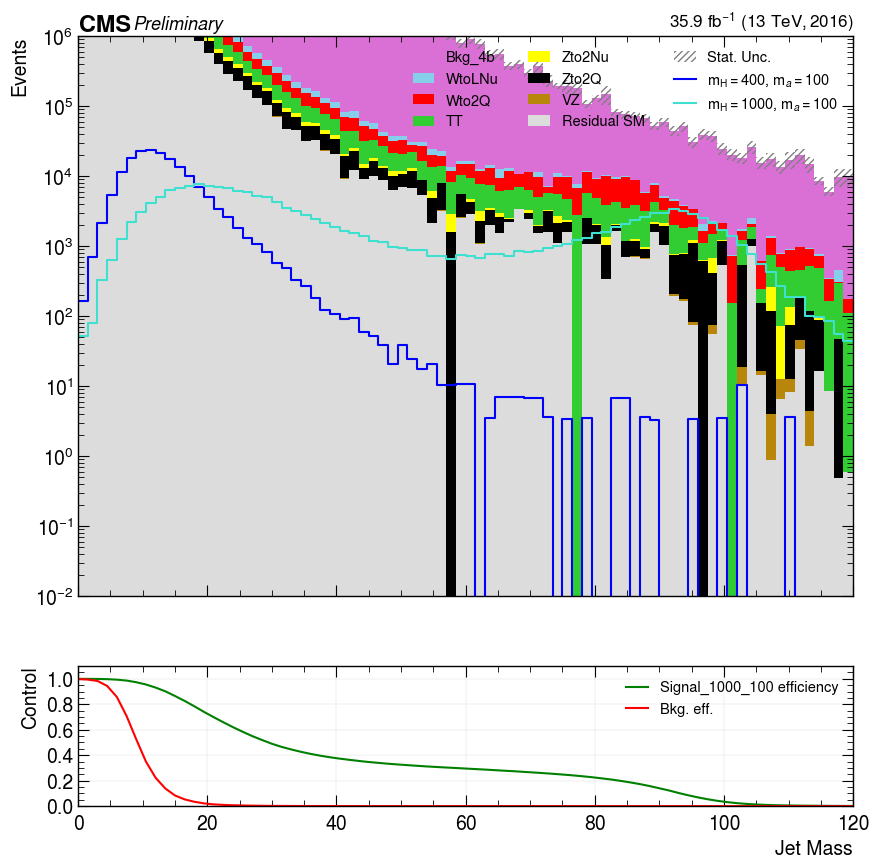

In [10]:
#=================================================================================================================
N = 1
#=================================================================================================================
#==================================================
ax1 = plt.subplot(ana.position(gs1,grid,N,1))              # Positioning at subplot 1 of the plot number 1
#==================================================
var = "Jet_mass"
bins = np.linspace(0,120,81)
ana.stacked_plot( ax1, var, dataframes, labels, colors, weight="evtWeight", bins=bins )  # Produce the stacked plot
ana.step_plot( ax1, var, df['Signal_400_100'], label=signal_label(400,100), color='blue', weight="evtWeight", bins=bins )
ana.step_plot( ax1, var, df['Signal_1000_100'], label=signal_label(1000,100), color='turquoise', weight="evtWeight", bins=bins )
# ana.step_plot( ax1, var, df_400_100, label=signal_label(400,100), color='slategray', weight="evtWeight", bins=bins )
ana.labels(ax1, ylabel="Events")  # Set up the label names
ana.style(ax1, lumi=35.9, year=2016, ylog=True, legend_ncol=3, ylim=[1.e-2,1.e6], xticklabels=False) # Set up the plot style and information on top

#==================================================
ax2 = plt.subplot(ana.position(gs1,grid,N,2), sharex=ax1)  # Positioning at subplot 2 of the plot number 2
# #==================================================
ctr = ana.control( var, [df['Signal_1000_100']], dataframes, weight="evtWeight", bins=bins )
#ctr.purity_plot()
ctr.signal_eff_plot(label='Signal_1000_100 efficiency')
ctr.bkg_eff_plot()
ana.labels(ax2, xlabel='Jet Mass', ylabel="Control")  # Set up the label names
ana.style(ax2, ylim=[0., 1.1], yticks=[0., 0.2, 0.4, 0.6, 0.8, 1.], xgrid=True, ygrid=True)


In [11]:
# def plot_roc_analysis( dataframes, labels, colors, title1,
#                     var, xlabel1, binMin1,binMax1,binn1, ylim_max,
#                     folder, binagem=None, cut_applied=None, below=False ):

def plot_analysis(  dataframes, #labels, colors, 
                        var, xlabel, binMin1, binMax1, binn1, binagem=None,
                        cut_applied=None, below=False  ):
    
    #=================================================================================================================
    N = 1
    #=================================================================================================================
    #==================================================
    ax1 = plt.subplot(ana.position(gs1,grid,N,1))              # Positioning at subplot 1 of the plot number 1
    #==================================================
    # var = "Jet_mass"
    bins = np.linspace(binMin1,binMax1,binn1)
    if binagem != None:
        bins = binagem
    ana.stacked_plot( ax1, var, dataframes, labels, colors, weight="evtWeight", bins=bins )  # Produce the stacked plot
    ana.step_plot( ax1, var, df['Signal_400_100'], label=signal_label(400,100), color='blue', weight="evtWeight", bins=bins )
    ana.step_plot( ax1, var, df['Signal_1000_100'], label=signal_label(1000,100), color='turquoise', weight="evtWeight", bins=bins )
    # ana.step_plot( ax1, var, df_400_100, label=signal_label(400,100), color='slategray', weight="evtWeight", bins=bins )
    # ana.labels(ax1, ylabel="Events")  # Set up the label names
    ana.labels(ax1, xlabel=xlabel)  # Set up the label names
    ana.style(ax1, lumi=35.9, year=2016, ylog=True, legend_ncol=3, ylim=[1.e-2,1.e6], xticklabels=False) # Set up the plot style and information on top

    #==================================================
    ax2 = plt.subplot(ana.position(gs1,grid,N,2), sharex=ax1)  # Positioning at subplot 2 of the plot number 2
    # #==================================================
    ctr = ana.control( var, [df['Signal_1000_100']], dataframes, weight="evtWeight", bins=bins )
    #ctr.purity_plot()
    ctr.signal_eff_plot(label='Signal_1000_100 efficiency')
    ctr.bkg_eff_plot()
    ana.labels(ax2, xlabel=r"$\Delta \phi^{ll, \mathrm{MET}}$", ylabel="Control")  # Set up the label names
    ana.style(ax2, ylim=[0., 1.1], yticks=[0., 0.2, 0.4, 0.6, 0.8, 1.], xgrid=True, ygrid=True)

In [12]:
infos = [
            { 'var':"Jet_mass", 'xlabel1':r"Dilepton $p_T$", 'binMin1':0, 'binMax1':120, 'binn1':81 },
            { 'var':"Jet_pt", 'xlabel1':r"Dilepton $p_T$", 'binMin1':30, 'binMax1':250, 'binn1':21 },
]

# for x in info_region:
#         infos.append(x)

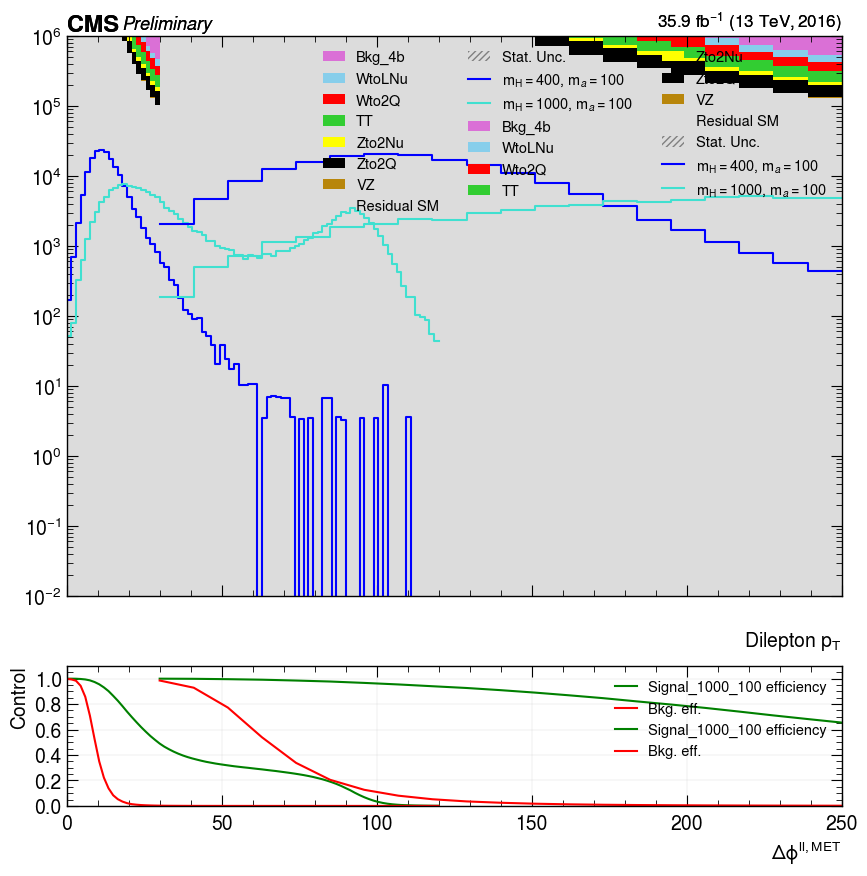

In [13]:
for info in infos:
    var = info.get("var")
    xlabel1 = info.get("xlabel1")
    binMin1 = info.get("binMin1")
    binMax1 = info.get("binMax1")
    binn1 = info.get("binn1")
    binagem = info.get("binagem")
    cuts = info.get("cuts")
    below = info.get("below")

# def plot_analysis(  dataframes, #labels, colors, 
#                         var, xlabel, binMin1, binMax1, binn1,
#                         folder, binagem=None,
#                         cut_applied=None, below=False  ):


    plot_analysis( dataframes,
                    var, xlabel1, binMin1, binMax1, binn1,
                    binagem, cut_applied=cuts )